<a href="https://colab.research.google.com/github/Git-Hub-Pro/ML-using-keras/blob/master/concrete_strength_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# google colab에 gdrive mount 하기(아래 링크 클릭후, 내용 복사 후 입력하기)
# 12시간 지나면 자동으로 해제되어서 지속적으로 로그인을 해주어야 한다.
from google.colab import drive
drive.mount('/content/gdrive/')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
import seaborn as sns
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [16]:
df = pd.read_excel("/content/gdrive/My Drive/data/Concrete_Data.xls")
df.head()
df.columns
# df =df.rename을 하지 않고 inplace를 적용하면 동작함.
df.rename(columns={
       'Cement (component 1)(kg in a m^3 mixture)':'cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'fly',
       'Water  (component 4)(kg in a m^3 mixture)':'water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'super',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine', 
       'Age (day)':'age',
       'Concrete compressive strength(MPa, megapascals) ':'strength'
       },inplace = True) 
df.head()

X = df.drop(['strength'],axis=1)

Y = df['strength']

scaler = MinMaxScaler();
X = scaler.fit_transform(X)
X.shape


(1030, 8)

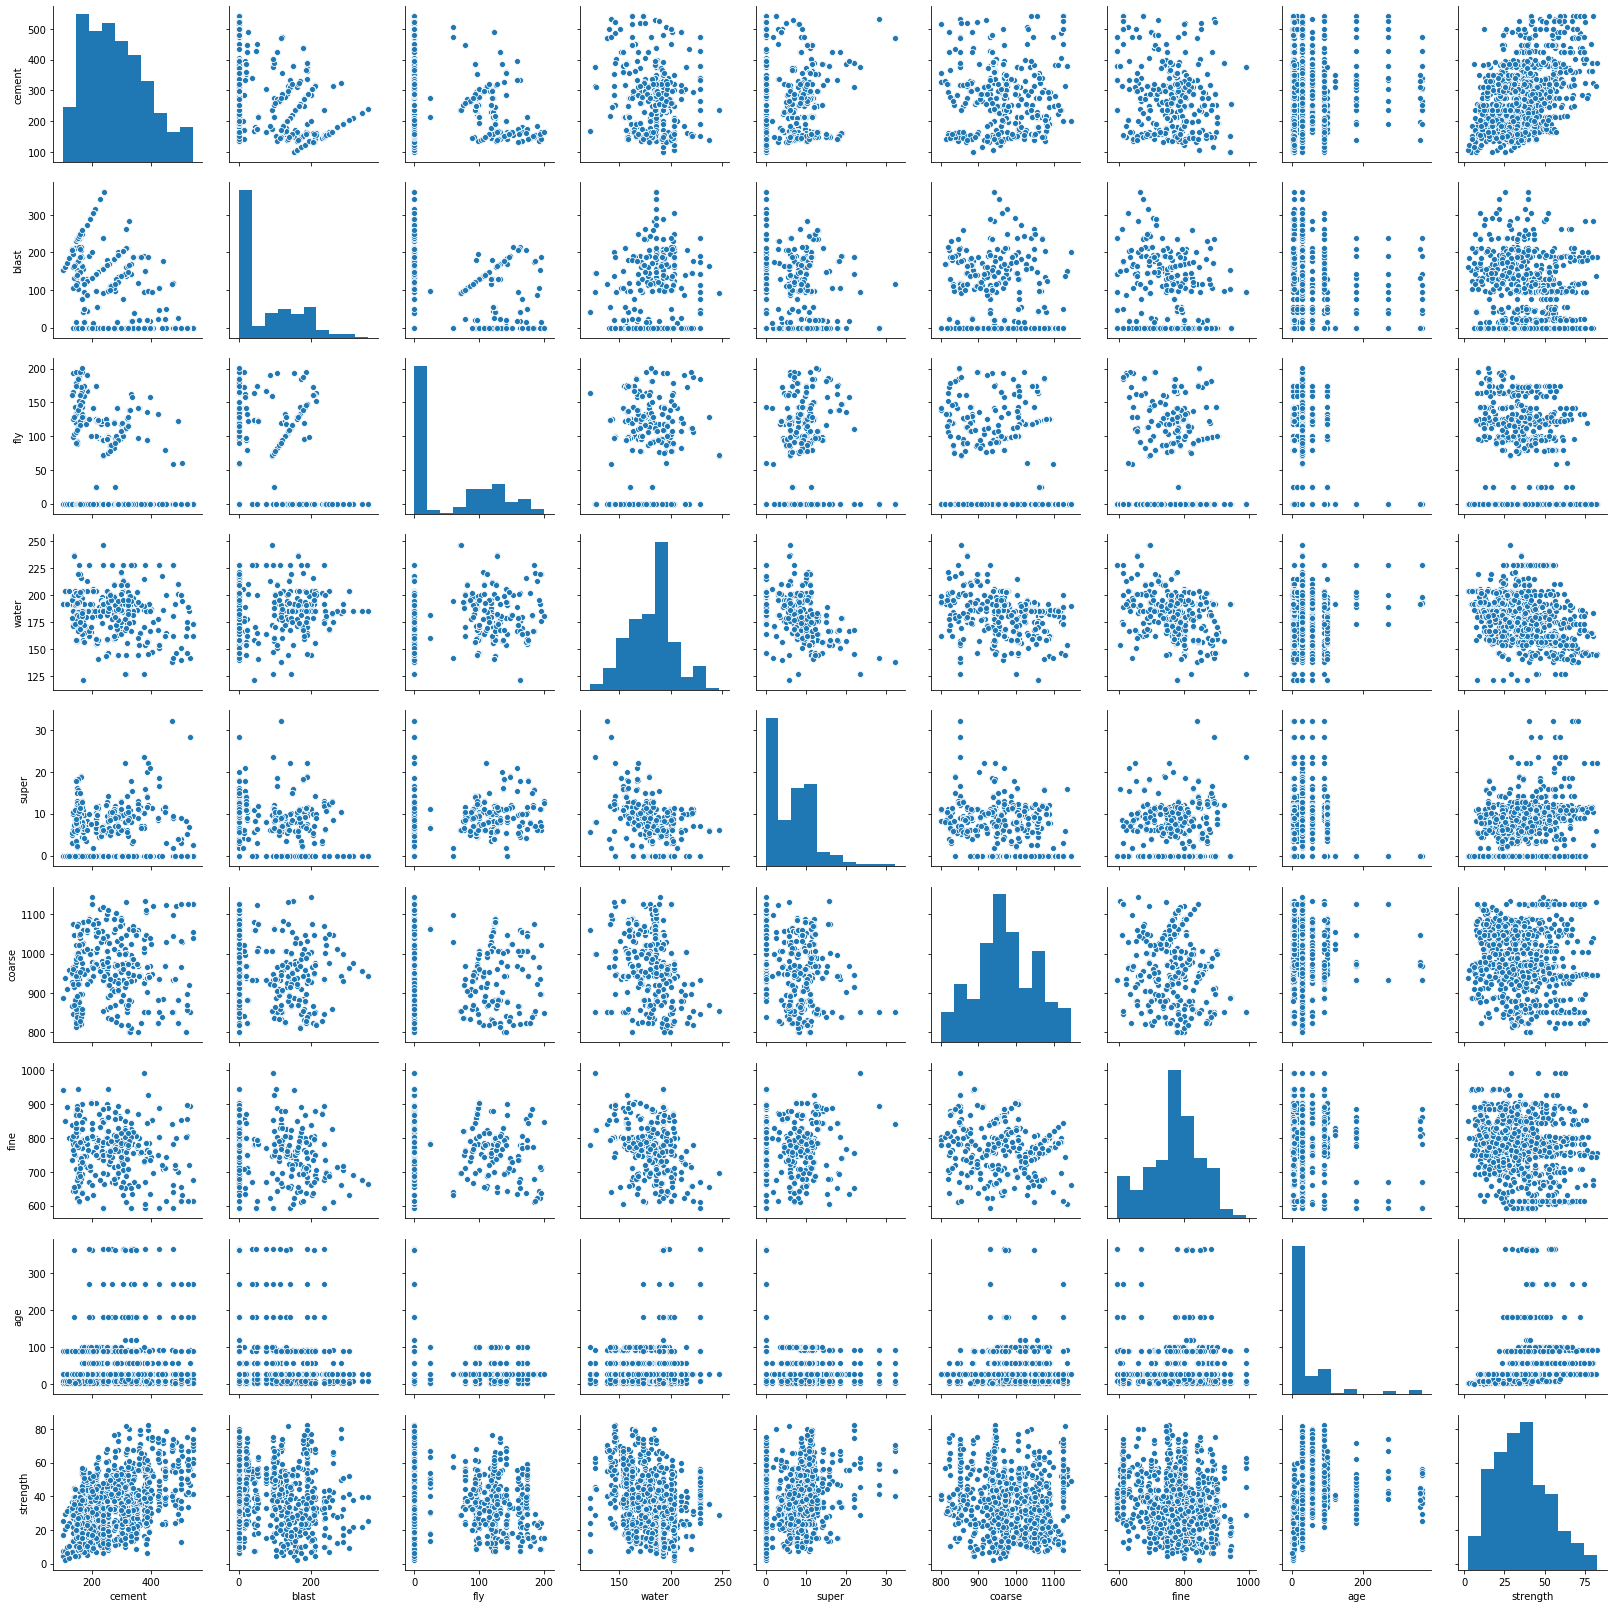

In [17]:
# 데이터 경향도를 잘 봐야 한다.
sns.pairplot(df)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1) # 0<=test_size<=1


In [31]:

model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(8,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='relu'))

model.compile(loss='mse',optimizer='sgd') # metric 사용시 따로 정의 필요
model.summary()


hist = model.fit(X_train,Y_train,epochs=100,validation_split=0.1)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               2304      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 39,361
Trainable params: 39,361
Non-trainable params: 0
_________________________________________________________________
Train on 834 samples, validate on 93 samples
Epoch 1/100
834/834 [==============================] - 0s 363us/step - loss: 1868.8767 - val_loss: 1741.4381
Epoch 2/100
834/834 [==============================] - 0s 86us/step - loss: 1513.3706 - val_lo

Text(0.5, 1.0, 'loss')

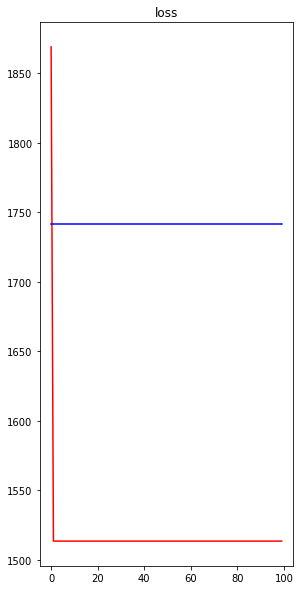

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)

plt.plot(hist.history['loss'],color='r')
plt.plot(hist.history['val_loss'],color='b')

plt.title('loss')

Text(0.5, 1.0, 'loss')

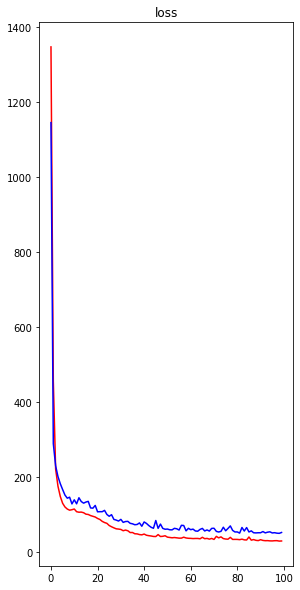

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)

plt.plot(hist.history['loss'],color='r')
plt.plot(hist.history['val_loss'],color='b')

plt.title('loss')


In [26]:
score = model.evaluate(X_test,Y_test)
print(score)

pred = model.predict(X_test[-5:])
print(pred)
print(Y_test[-5:])

103/103 [==============================] - 0s 79us/step
54.855200832329906
[[51.356617]
 [28.837246]
 [50.619823]
 [48.23602 ]
 [43.395603]]
227    32.853531
655    33.947730
701    50.526870
298    48.153004
895    49.773272
Name: strength, dtype: float64
